In [103]:
import pandas as pd

In [104]:
data = pd.read_csv("D:/FDS/Projects/16s_rRNA/DiabImmune_Metagenomic_sequencing_assay.txt", sep="\t")
data.to_csv("microbiome.csv", index=False)

C:\Users\Dnyanesh\AppData\Local\Temp\ipykernel_30540\4184733410.py:1: DtypeWarning: Columns (2676,2761,2763,2765,2767,2831,2834,2852,2875,2956,2961,2973,3232,3253,3354,3368,3370,3389,3391,3393,3413,3423,4210,4212,4231,4469,4522,4526,4531,4533,4536,4538,4540,4542,4544,4546,4548,4550) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:/FDS/Projects/16s_rRNA/DiabImmune_Metagenomic_sequencing_assay.txt", sep="\t")


In [105]:
df = pd.read_csv("D:/FDS/Projects/16s_rRNA/microbiome.csv")

C:\Users\Dnyanesh\AppData\Local\Temp\ipykernel_30540\219931195.py:1: DtypeWarning: Columns (2676,2761,2763,2765,2767,2831,2834,2852,2875,2956,2961,2973,3232,3253,3354,3368,3370,3389,3391,3393,3413,3423,4210,4212,4231,4469,4522,4526,4531,4533,4536,4538,4540,4542,4544,4546,4548,4550) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/FDS/Projects/16s_rRNA/microbiome.csv")


In [106]:
print(df.head())

  Metagenomic_sequencing_assay_Id  Sample_Id participant_repeated_measure_Id  \
0                   3000007 (WGS)    3000007              E006091_1 (Source)   
1                   3000044 (WGS)    3000044              E004781_1 (Source)   
2                   3000052 (WGS)    3000052              E004934_2 (Source)   
3                   3000054 (WGS)    3000054              E004898_2 (Source)   
4                   3000058 (WGS)    3000058              E004628_1 (Source)   

     Participant_Id  \
0  E006091 (Source)   
1  E004781 (Source)   
2  E004934 (Source)   
3  E004898 (Source)   
4  E004628 (Source)   

   1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] reductase [EUPATH_0009247_1_1_1_100]  \
0                                         315.023025                                  
1                                         308.681880                                  
2                                         200.638319                                  
3                               

In [107]:
object_cols = df.select_dtypes(include=['object']).columns

In [108]:
for col in object_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:20])


Column: Metagenomic_sequencing_assay_Id
['3000007 (WGS)' '3000044 (WGS)' '3000052 (WGS)' '3000054 (WGS)'
 '3000058 (WGS)' '3000064 (WGS)' '3000085 (WGS)' '3000095 (WGS)'
 '3000106 (WGS)' '3000110 (WGS)' '3000139 (WGS)' '3000144 (WGS)'
 '3000602 (WGS)' '3100015 (WGS)' '3100028 (WGS)' '3100075 (WGS)'
 '3100078 (WGS)' '3100079 (WGS)' '3100081 (WGS)' '3100082 (WGS)']

Column: participant_repeated_measure_Id
['E006091_1 (Source)' 'E004781_1 (Source)' 'E004934_2 (Source)'
 'E004898_2 (Source)' 'E004628_1 (Source)' 'E004709_2 (Source)'
 'E003953_2 (Source)' 'E003393_2 (Source)' 'E003188_1 (Source)'
 'E001958_2 (Source)' 'E002473_1 (Source)' 'E002338_1 (Source)'
 'T000461_4 (Source)' 'T002534_3 (Source)' 'T005999_1 (Source)'
 'P005558_3 (Source)' 'P001363_6 (Source)' 'P000648_5 (Source)'
 'P000648_7 (Source)' 'P000756_4 (Source)']

Column: Participant_Id
['E006091 (Source)' 'E004781 (Source)' 'E004934 (Source)'
 'E004898 (Source)' 'E004628 (Source)' 'E004709 (Source)'
 'E003953 (Source)' 'E00

In [109]:
def clean_and_convert(series):
    series = series.str.replace('<', '', regex=False) # Remove '<' if present
    series = pd.to_numeric(series, errors='coerce') # Convert to numeric, non-numeric become NaN
    return series

for col in object_cols:
    df[col] = clean_and_convert(df[col])

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import os

# Function to check if a file exists
def file_exists(filename):
    return os.path.exists(filename)

df = pd.read_csv("D:/FDS/Projects/16s_rRNA/microbiome.csv")

numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop(['Sample_Id'], errors='ignore')

# Check if histograms.png exists; skip if it does
if not file_exists('histograms.png'):
    df[numeric_cols].hist(figsize=(15, 10), bins=20)
    plt.suptitle("Histograms of Numeric Columns", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('histograms.png')
    plt.show()

if 'group_column' in df.columns:
    for col in numeric_cols:
        filename = f'boxplot_{col}.png'
        if not file_exists(filename):  # Check before creating
            plt.figure()
            sns.boxplot(x='group_column', y=col, data=df)
            plt.title(f"Box plot of {col} across groups")
            plt.savefig(filename)
            plt.show()
else:
    print("Warning: 'group_column' not found. Skipping box plots.")


#Using a temporary file to check for existence of pairplot
temp_pairplot_file = "temp_pairplot.txt"  #temporary file to check for pairplot
if not file_exists('pairplot.png'):
    subset = df[numeric_cols].sample(n=10, axis=1)
    scaler = StandardScaler()
    subset_scaled = scaler.fit_transform(subset)
    sns.pairplot(pd.DataFrame(subset_scaled))
    plt.savefig('pairplot.png')
    plt.show()
    with open(temp_pairplot_file, "w") as f: # Create temporary file to signify pairplot was generated
        f.write("Pairplot generated")


# Check for heatmap.png existence
if not file_exists('heatmap.png'):
    subset = df[numeric_cols].sample(n=20, axis=1)
    scaler = StandardScaler()
    subset_scaled = scaler.fit_transform(subset)
    corr_matrix = pd.DataFrame(subset_scaled).corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap of a Subset of Columns")
    plt.savefig('heatmap.png')
    plt.show()


#Clean up the temporary file used for pairplot
if os.path.exists(temp_pairplot_file):
    os.remove(temp_pairplot_file)

C:\Users\Dnyanesh\AppData\Local\Temp\ipykernel_30540\2802310230.py:12: DtypeWarning: Columns (2676,2761,2763,2765,2767,2831,2834,2852,2875,2956,2961,2973,3232,3253,3354,3368,3370,3389,3391,3393,3413,3423,4210,4212,4231,4469,4522,4526,4531,4533,4536,4538,4540,4542,4544,4546,4548,4550) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/FDS/Projects/16s_rRNA/microbiome.csv")


In [111]:

# Separate object and numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
object_cols = df.select_dtypes(include=['object']).columns


# Fill NaN values in numeric columns with 0
for col in numeric_cols:
    df[col] = df[col].fillna(0)

In [112]:
# Separate object and numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
object_cols = df.select_dtypes(include=['object']).columns

# Fill NaN values in numeric columns with 0
df[numeric_cols] = df[numeric_cols].fillna(0)


#Print the data types to confirm that the data type has been changed
print(df.dtypes)

Metagenomic_sequencing_assay_Id                                                                   object
Sample_Id                                                                                          int64
participant_repeated_measure_Id                                                                   object
Participant_Id                                                                                    object
1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] reductase [EUPATH_0009247_1_1_1_100]                 float64
                                                                                                  ...   
unclassified Rhodotorula [EUPATH_0009269_Basidiomycota_0b83ac425df4aef1]                         float64
unclassified Saccharomycetales [EUPATH_0009268_Ascomycota_Saccharomycetes_Saccharomycetales_]     object
unclassified Saccharomycetales [EUPATH_0009269_Ascomycota_Saccharomycetes_Saccharomycetales_]    float64
unclassified Wickerhamomyces [EUPATH_0009268_Ascomycota

In [113]:
for col in df.columns:  # Iterate through ALL columns
    # Attempt to convert the column to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Fill NaN values with 0 ONLY if the column is now numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)


In [114]:
all_data_cols = df.columns[~df.isnull().any()]
num_all_data_cols = len(all_data_cols)

print(f"Columns with only data: {all_data_cols}")
print(f"Number of columns with only data: {num_all_data_cols}")


Columns with only data: Index(['Metagenomic_sequencing_assay_Id', 'Sample_Id',
       'participant_repeated_measure_Id', 'Participant_Id',
       '1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] reductase [EUPATH_0009247_1_1_1_100]',
       '1.1.1.103: L-threonine 3-dehydrogenase [EUPATH_0009247_1_1_1_103]',
       '1.1.1.105: All-trans-retinol dehydrogenase (NAD(+)) [EUPATH_0009247_1_1_1_105]',
       '1.1.1.107: Pyridoxal 4-dehydrogenase [EUPATH_0009247_1_1_1_107]',
       '1.1.1.108: Carnitine 3-dehydrogenase [EUPATH_0009247_1_1_1_108]',
       '1.1.1.119: Glucose 1-dehydrogenase (NADP(+)) [EUPATH_0009247_1_1_1_119]',
       ...
       'unclassified Meyerozyma [EUPATH_0009268_Ascomycota_2bd7ab34acd7d622]',
       'unclassified Meyerozyma [EUPATH_0009269_Ascomycota_2bd7ab34acd7d622]',
       'unclassified Penicillium [EUPATH_0009268_Ascomycota_Eurotiomycetes_Eurotiales_Aspergillaceae_Penicillium_]',
       'unclassified Penicillium [EUPATH_0009269_Ascomycota_Eurotiomycetes_Eurotiales_Asp

In [115]:
# Count columns with only zeros
only_zeros_cols = df.columns[(df == 0).all()]
num_only_zeros_cols = len(only_zeros_cols)

print(f"Columns with only zeros: {only_zeros_cols}")
print(f"Number of columns with only zeros: {num_only_zeros_cols}")

Columns with only zeros: Index(['Metagenomic_sequencing_assay_Id', 'participant_repeated_measure_Id',
       'Participant_Id',
       '3-HYDROXYPHENYLACETATE-DEGRADATION-PWY: 4-hydroxyphenylacetate degradation [EUPATH_0009249_3_HYDROXYPHENYLACETATE_DEGRADATION_PWY]',
       'AEROBACTINSYN-PWY: aerobactin biosynthesis [EUPATH_0009249_AEROBACTINSYN_PWY]',
       'ALL-CHORISMATE-PWY: superpathway of chorismate metabolism [EUPATH_0009249_ALL_CHORISMATE_PWY]',
       'ALLANTOINDEG-PWY: superpathway of allantoin degradation in yeast [EUPATH_0009249_ALLANTOINDEG_PWY]',
       'ARGORNPROST-PWY: arginine, ornithine and proline interconversion [EUPATH_0009249_ARGORNPROST_PWY]',
       'Aspergillus sp. MA 6041 [EUPATH_0009268_Ascomycota_79587b54c472d541]',
       'Blastocystis sp. subtype 1 [EUPATH_0009266__24cbf35d04cda59d]',
       ...
       '[Candida] inconspicua [EUPATH_0009268_Ascomycota_6bdeab52b5623862]',
       '[Candida] intermedia [EUPATH_0009268_Ascomycota_47fbdc6d02e335df]',
       '

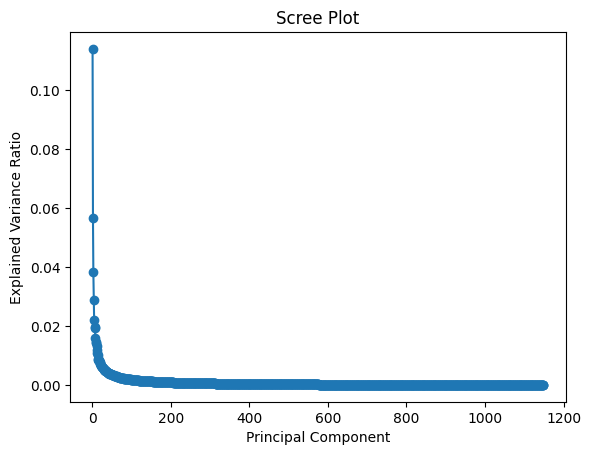

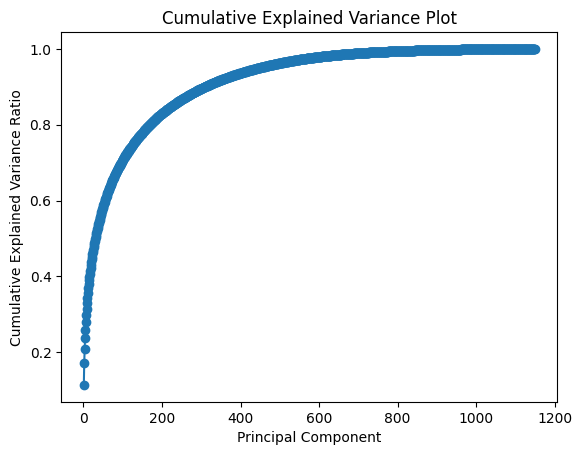

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ... (Your data loading and preprocessing) ...

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df) #scale all columns

pca = PCA()
pca.fit(data_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance Plot")
plt.show()

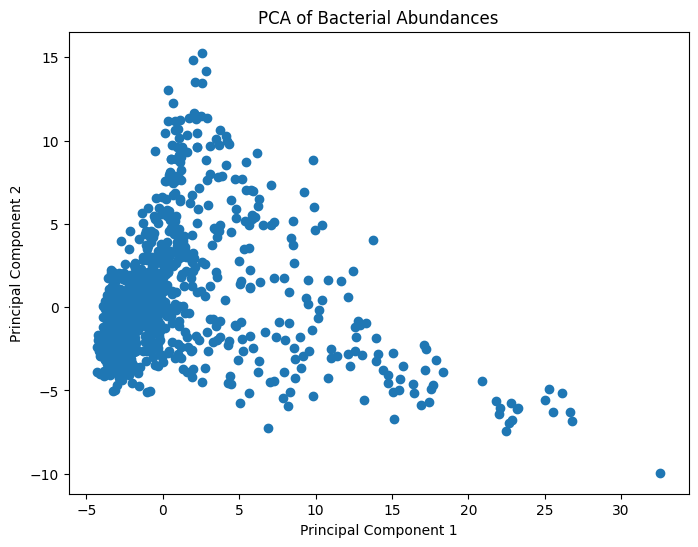

Explained Variance Ratio (first two components): [0.14352401 0.07050333 0.04314911 0.03341689 0.03050244 0.02755142
 0.02505031 0.02169484 0.02100116 0.01958708 0.01867554 0.01746381
 0.01666736 0.01585889 0.01457513 0.01374128 0.01351337 0.01325794
 0.01291057 0.01209734 0.01138173 0.01072092 0.01052254 0.01009162
 0.00970635 0.00936578 0.00923962 0.00875414 0.00863792 0.00792978]


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming your DataFrame is named 'df' and bacterial abundance columns are selected
bacteria_cols = df.columns[df.columns.str.startswith(('1.1.1', 'unclassified'))]
abundance_data = df[bacteria_cols]

# 1. Data scaling: essential for PCA
scaler = StandardScaler()
abundance_scaled = scaler.fit_transform(abundance_data)

# 2. PCA: Reduce to 2 or 3 principal components
pca = PCA(n_components=30)  # Reduce to 2 dimensions for 2D plot
pca_result = pca.fit_transform(abundance_scaled)


# 3. Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])  # Scatter plot of the first two principal components
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Bacterial Abundances")
plt.show()


#Explained variance ratio
print(f"Explained Variance Ratio (first two components): {pca.explained_variance_ratio_}")

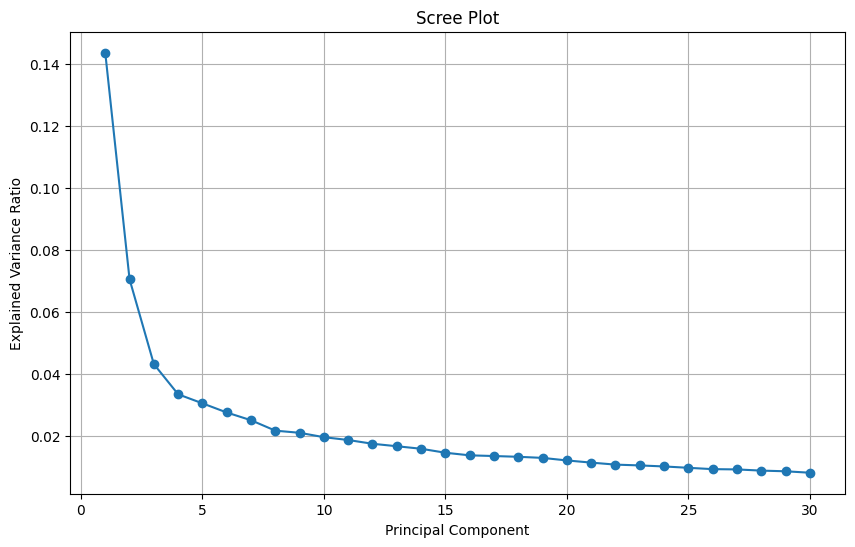

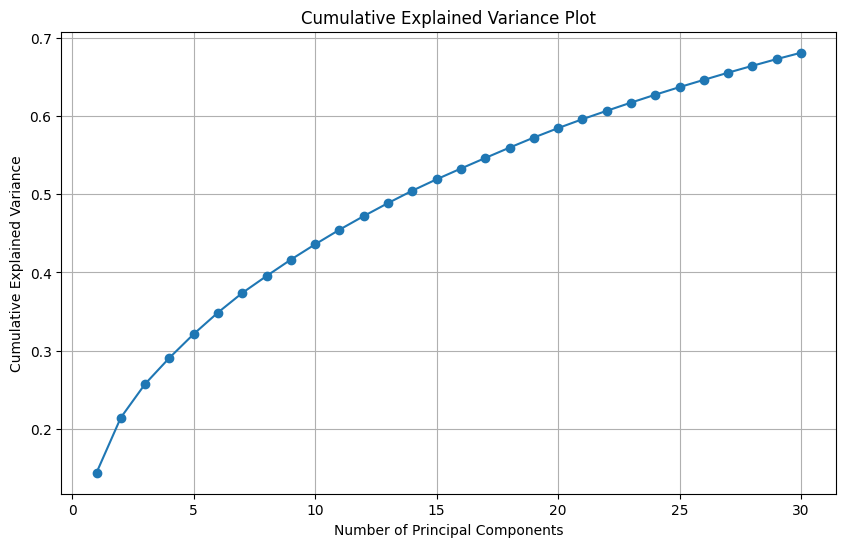

In [118]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance_ratios = np.array([0.14352401, 0.07050333, 0.04314911, 0.03341689, 0.03050244, 0.02755147,
                                     0.02505026, 0.0216949,  0.0210012,  0.01958899, 0.0186768,  0.01746662,
                                     0.01667167, 0.01585866, 0.01457447, 0.01373686, 0.01351277, 0.01326791,
                                     0.01291394, 0.01209333, 0.01139469, 0.0107462,  0.01048511, 0.01015526,
                                     0.00971888, 0.00928771, 0.00919734, 0.00881322, 0.00859651, 0.00813296])

cumulative_variance = np.cumsum(explained_variance_ratios)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

# Cumulative explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")
plt.grid(True)
plt.show()

In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ... (Your data loading and preprocessing) ...

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df) #scale all columns

pca = PCA(n_components=30) # n_components is the number you determined
pca_result = pca.fit_transform(data_scaled)

In [120]:
columns_to_drop = ['Metagenomic_sequencing_assay_Id', 'Sample_Id', 'Participant_Id', 'participant_repeated_measure_Id']
df = df.drop(columns=columns_to_drop)

In [121]:
df

,1.1.1.100: 3-oxoacyl-[acyl-carrier-protein] reductase [EUPATH_0009247_1_1_1_100],1.1.1.103: L-threonine 3-dehydrogenase [EUPATH_0009247_1_1_1_103],1.1.1.105: All-trans-retinol dehydrogenase (NAD(+)) [EUPATH_0009247_1_1_1_105],1.1.1.107: Pyridoxal 4-dehydrogenase [EUPATH_0009247_1_1_1_107],1.1.1.108: Carnitine 3-dehydrogenase [EUPATH_0009247_1_1_1_108],1.1.1.119: Glucose 1-dehydrogenase (NADP(+)) [EUPATH_0009247_1_1_1_119],1.1.1.11: D-arabinitol 4-dehydrogenase [EUPATH_0009247_1_1_1_11],1.1.1.121: Aldose 1-dehydrogenase (NAD(+)) [EUPATH_0009247_1_1_1_121],1.1.1.122: D-threo-aldose 1-dehydrogenase [EUPATH_0009247_1_1_1_122],1.1.1.125: 2-deoxy-D-gluconate 3-dehydrogenase [EUPATH_0009247_1_1_1_125],...,unclassified Meyerozyma [EUPATH_0009268_Ascomycota_2bd7ab34acd7d622],unclassified Meyerozyma [EUPATH_0009269_Ascomycota_2bd7ab34acd7d622],unclassified Penicillium [EUPATH_0009268_Ascomycota_Eurotiomycetes_Eurotiales_Aspergillaceae_Penicillium_],unclassified Penicillium [EUPATH_0009269_Ascomycota_Eurotiomycetes_Eurotiales_Aspergillaceae_Penicillium_],unclassified Rhodotorula [EUPATH_0009268_Basidiomycota_0b83ac425df4aef1],unclassified Rhodotorula [EUPATH_0009269_Basidiomycota_0b83ac425df4aef1],unclassified Saccharomycetales [EUPATH_0009268_Ascomycota_Saccharomycetes_Saccharomycetales_],unclassified Saccharomycetales [EUPATH_0009269_Ascomycota_Saccharomycetes_Saccharomycetales_],unclassified Wickerhamomyces [EUPATH_0009268_Ascomycota_cfab901d7c874079],unclassified Wickerhamomyces [EUPATH_0009269_Ascomycota_cfab901d7c874079]
0,315.023025,136.408674,0.0,0.00000,0.0,0.0,0.000000,0.0,2.31145,5.27564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,308.681880,232.803530,0.0,0.00000,0.0,0.0,0.000000,0.0,0.00000,7.94169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200.638319,36.086540,0.0,4.49922,0.0,0.0,1.443510,0.0,105.63000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,240.788650,4.232967,0.0,0.00000,0.0,0.0,0.000000,0.0,49.51036,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,645.348062,242.425780,0.0,0.00000,0.0,0.0,0.000000,0.0,6.97671,121.34488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,233.225488,45.830020,0.0,0.00000,0.0,0.0,0.000000,0.0,53.87350,1.97811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1145,79.071942,17.748598,0.0,0.00000,0.0,0.0,0.000000,0.0,3.43461,1.35812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1146,122.075740,22.749330,0.0,0.00000,0.0,0.0,0.000000,0.0,125.07910,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1147,232.053552,35.369130,0.0,0.00000,0.0,0.0,0.000000,0.0,22.11940,2.56619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:

#Drop the ID column, assuming it is the first column
bacteria_data = df

#Flatten the DataFrame into a 1D array:
all_values = bacteria_data.values.flatten()

# Remove NaN values (important!):
all_values = all_values[~np.isnan(all_values)]

# Calculate statistics for the flattened array:
mean = np.mean(all_values)
std_dev = np.std(all_values)
variance = np.var(all_values)


print(f"Mean of all values: {mean}")
print(f"Standard deviation of all values: {std_dev}")
print(f"Variance of all values: {variance}")

Mean of all values: 84.91015491362134
Standard deviation of all values: 410.47754071880576
Variance of all values: 168491.81143455885


In [142]:
#Drop the ID column, assuming it is the first column
bacteria_data = df

#Flatten the DataFrame into a 1D array:
all_values = bacteria_data.values.flatten()

# Remove NaN values (important!):
all_values = all_values[~np.isnan(all_values)]

# Calculate statistics for the flattened array:
mean = np.mean(all_values)
std_dev = np.std(all_values)
variance = np.var(all_values)
median = np.median(all_values)
min_val = np.min(all_values)
max_val = np.max(all_values)


print(f"Mean of all values: {mean}")
print(f"Standard deviation of all values: {std_dev}")
print(f"Variance of all values: {variance}")
print(f"Median of all values: {median}")
print(f"Minimum value: {min_val}")
print(f"Maximum value: {max_val}")

Mean of all values: 84.91015491362134
Standard deviation of all values: 410.47754071880576
Variance of all values: 168491.81143455885
Median of all values: 0.0
Minimum value: 0.0
Maximum value: 40148.63369
